In [1]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test_val, y_test_val) = cifar10.load_data()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test_val.shape: ", x_test_val.shape)
print("y_test_val.shape: ", y_test_val.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test_val.shape:  (10000, 32, 32, 3)
y_test_val.shape:  (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

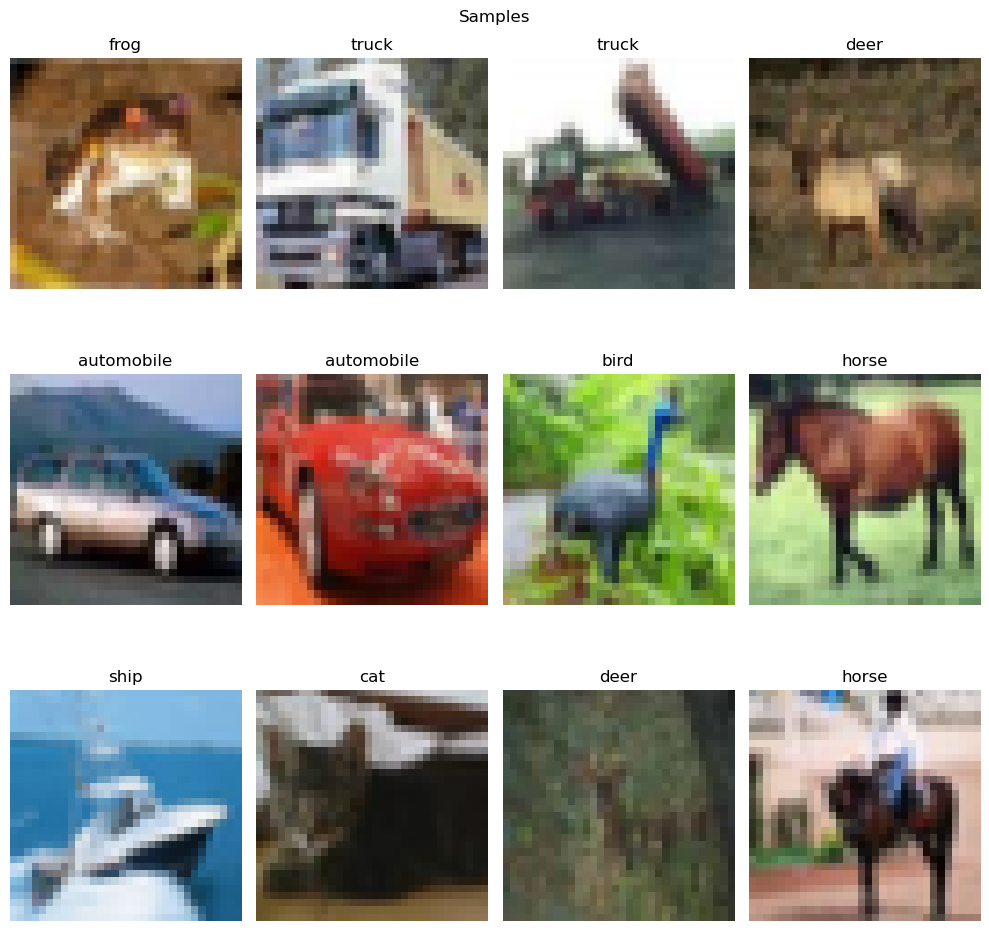

In [4]:
import matplotlib.pyplot as plt

def show_samples(data, labels):
    fig, axes = plt.subplots(3, 4, figsize=(10, 10))

    axes = axes.flatten()

    for i in range(len(axes)):
        
        axes[i].imshow(data[i])
        
        class_index=labels[i][0]
        
        class_name=class_names[class_index]
        axes[i].set_title(class_name)
        
        axes[i].axis('off')  
    
    
    plt.tight_layout()
    
    fig.suptitle("Samples")
    
    plt.show()

show_samples(x_train, y_train)

In [5]:
from sklearn.model_selection import train_test_split

x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5)

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'  ))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu' ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
391/391 [==============================] - 50s 124ms/step - loss: 1.6420 - accuracy: 0.3967 - val_loss: 1.2631 - val_accuracy: 0.5370
Epoch 2/40
391/391 [==============================] - 45s 116ms/step - loss: 1.2456 - accuracy: 0.5536 - val_loss: 1.0987 - val_accuracy: 0.6146
Epoch 3/40
391/391 [==============================] - 46s 117ms/step - loss: 1.0708 - accuracy: 0.6183 - val_loss: 0.9457 - val_accuracy: 0.6670
Epoch 4/40
391/391 [==============================] - 46s 117ms/step - loss: 0.9582 - accuracy: 0.6628 - val_loss: 0.8475 - val_accuracy: 0.7002
Epoch 5/40
391/391 [==============================] - 46s 118ms/step - loss: 0.8675 - accuracy: 0.6947 - val_loss: 0.7845 - val_accuracy: 0.7218
Epoch 6/40
391/391 [==============================] - 46s 117ms/step - loss: 0.8156 - accuracy: 0.7154 - val_loss: 0.7603 - val_accuracy: 0.7318
Epoch 7/40
391/391 [==============================] - 46s 118ms/step - loss: 0.7600 - accuracy: 0.7340 - val_loss: 0.7546 - val_ac

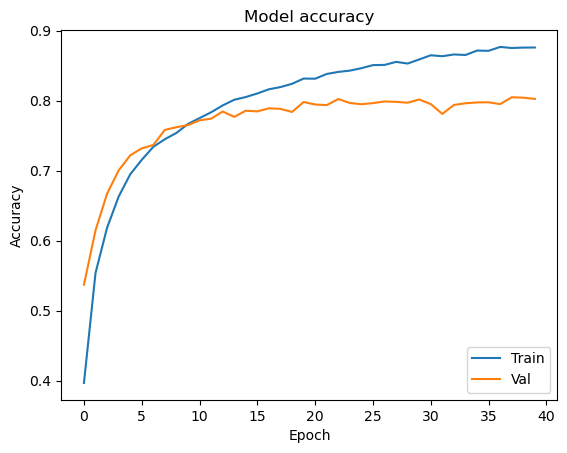

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on test set:', accuracy)

157/157 [==============================] - 2s 10ms/step - loss: 0.6302 - accuracy: 0.8054
Accuracy on test set: 0.805400013923645


In [ ]:
# !pip install scikeras

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier

import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def create_model(filters=32,
                 kernel_size=(3, 3), 
                 pool_size=(2, 2),
                 activation='relu', 
                 optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 dropout_rate=0.25,
                 dense_units=512,
                 dense_dropout_rate=0.5):
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(filters=2*filters, kernel_size=kernel_size, activation=activation))
    model.add(Conv2D(filters=2*filters, kernel_size=kernel_size, activation=activation))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(units=dense_units, activation=activation))
    model.add(Dropout(dense_dropout_rate))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model


model_class_keras = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    'model__filters': [32, 64],
    'model__kernel_size': [(3, 3),(4,4) ],
    'model__pool_size': [(2, 2), (4,4)],
    'model__activation': ['relu'],
    'model__optimizer': ['adam'],
    'model__loss': ['sparse_categorical_crossentropy'],
    'model__dropout_rate': [0.2, 0.25],
    'model__dense_units': [256, 512],
    'model__dense_dropout_rate': [0.4, 0.5]
}

cv =5

grid = GridSearchCV(estimator=model_class_keras, param_grid=param_grid, cv=cv, verbose=0)

grid_result = grid.fit(x_train, y_train)

results_df = pd.DataFrame(grid_result.cv_results_)

results_df.to_csv('grid_search_results.csv', index=False)

'''

In [ ]:
# grid_result.best_params_

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'  ))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu' ))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
391/391 [==============================] - 100s 253ms/step - loss: 1.5554 - accuracy: 0.4300 - val_loss: 1.2186 - val_accuracy: 0.5606
Epoch 2/40
391/391 [==============================] - 97s 248ms/step - loss: 1.1279 - accuracy: 0.5967 - val_loss: 1.0212 - val_accuracy: 0.6382
Epoch 3/40
391/391 [==============================] - 98s 251ms/step - loss: 0.9397 - accuracy: 0.6694 - val_loss: 0.8162 - val_accuracy: 0.7036
Epoch 4/40
391/391 [==============================] - 98s 250ms/step - loss: 0.8202 - accuracy: 0.7141 - val_loss: 0.8454 - val_accuracy: 0.7122
Epoch 5/40
391/391 [==============================] - 98s 250ms/step - loss: 0.7270 - accuracy: 0.7443 - val_loss: 0.7038 - val_accuracy: 0.7558
Epoch 6/40
391/391 [==============================] - 98s 251ms/step - loss: 0.6627 - accuracy: 0.7664 - val_loss: 0.6959 - val_accuracy: 0.7608
Epoch 7/40
391/391 [==============================] - 98s 251ms/step - loss: 0.6139 - accuracy: 0.7830 - val_loss: 0.6537 - val_a

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.9446399807929993
Validation Accuracy: 0.8022000193595886


In [13]:
model.save('cifar10_trained_model.keras')

In [14]:
from keras.models import load_model

model = load_model('cifar10_trained_model.keras')

1/1 [==============================] - 0s 122ms/step


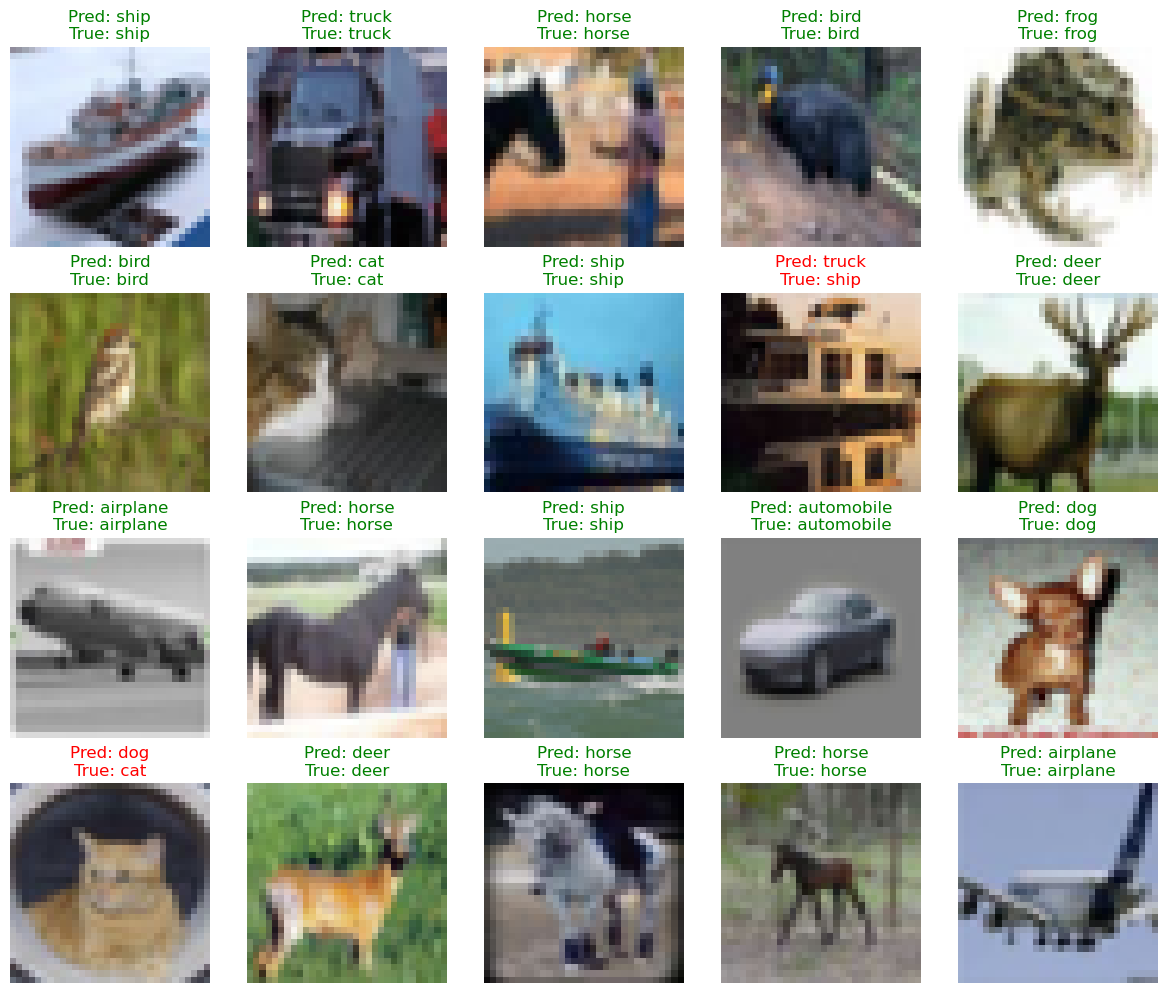

In [15]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 20
x_test_selected = x_test[:num_images]
y_test_selected = y_test[:num_images]

predictions = model.predict(x_test_selected)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_images):
    
    axes[i].imshow(x_test_selected[i])
    axes[i].axis('off')
    
    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[y_test_selected[i][0]]
    
    if predicted_label == true_label:
        title_color = 'green'
    else:
        title_color = 'red'
    
    axes[i].set_title(f'Pred: {predicted_label}\nTrue: {true_label}', color=title_color)

plt.tight_layout()
plt.show()

In [16]:
for i in range(10):
    image = x_test[i]
    label = class_names[y_test[i][0]]
    
    file_name = f'image_{i}_label_{label}.png'
    plt.imsave(file_name, image)

In [18]:
image_path = 'image_5_label_bird.png'

In [19]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

image = load_img(image_path, target_size=(32, 32))

image_array = img_to_array(image)

image_array = np.expand_dims(image_array, axis=0)

image_array = image_array / 255.0

In [20]:
image_array.shape

(1, 32, 32, 3)

In [23]:
predictions = model.predict([image_array])
# print(predictions[0])

predicted_class = np.argmax(predictions[0])

predicted_label = class_names[predicted_class]

1/1 [==============================] - 0s 21ms/step


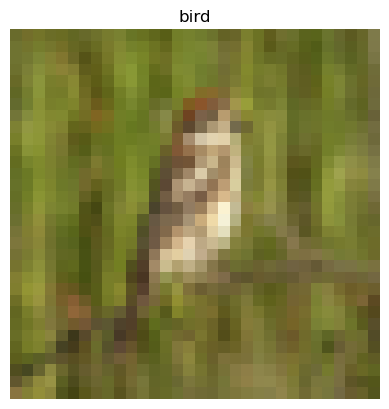

In [24]:
plt.imshow(image)
plt.title(predicted_label)
plt.axis('off')
plt.show()